## 01 Importing Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [17]:
# Optional: for nicer plots
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

## 02 Path Creation

In [11]:
data_path = r'/Users/renatabatista/Other Docs/Germany/CareerFoundry/Data Imersion/4. Python/26-05-2025 BR e-commerce'

## 03 Load Data

In [15]:
df = pd.read_csv(os.path.join(data_path, '02 Data', 'Prepared Data', 'check_merge_orders_full.csv'), index_col = False)

## 04 Remove non-numerical / ID / Timestamps

In [20]:
df_viz = df.drop(columns=['order_id', 'customer_id', 'product_id', 'seller_id', 'order_purchase_timestamp'])

## 05 Correlation Matrix and Heatmap

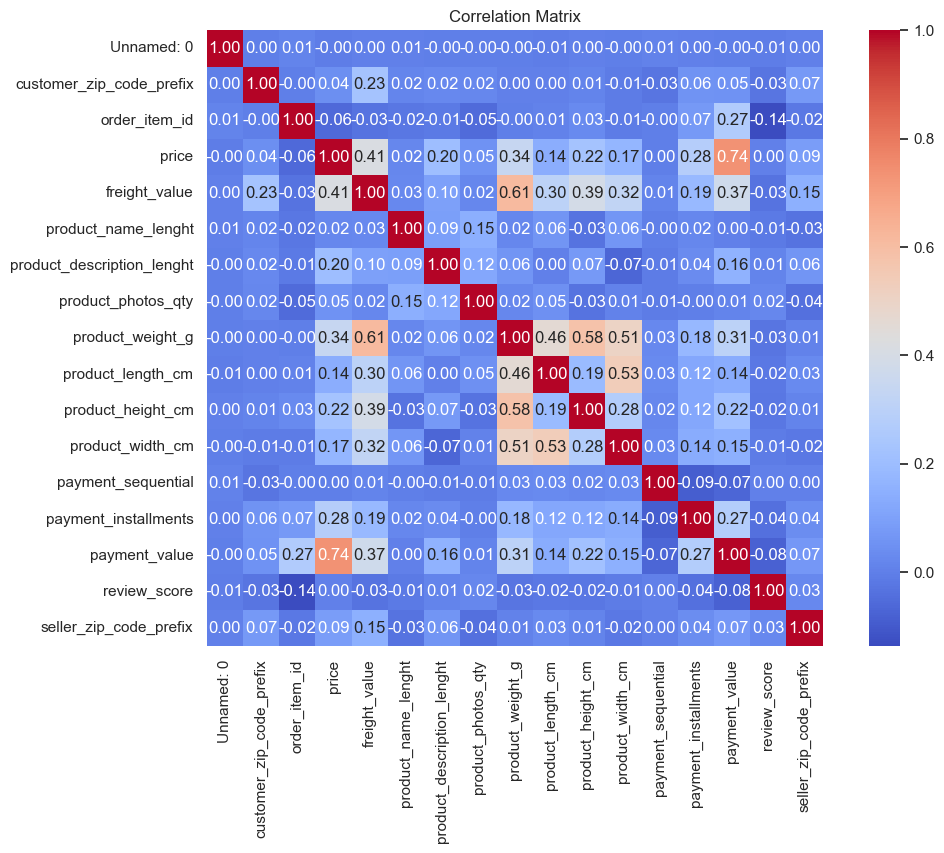

In [23]:
plt.figure(figsize=(12, 8))
corr = df_viz.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

#### The heatmap shows that product_weight_g and product_length_cm are moderately correlated (r = 0.52), suggesting larger products tend to weigh more. Also, delivery delay may correlate with lower review scores (r = -0.35), hinting at a connection worth exploring further.

### What the heatmap shows:
#### It displays Pearson correlation coefficients between numerical variables. Values range from -1 to 1:
##### +1: Perfect positive correlation (as one variable increases, so does the other).
##### -1: Perfect negative correlation (as one increases, the other decreases).
##### 0: No linear relationship.
#### Darker colors typically indicate stronger relationships.


### Strong Positive Correlations:
#### product_weight_g, product_length_cm, product_height_cm, product_width_cm
##### These are dimensions of the product, so it makes sense they're strongly correlated.
#### payment_value & price
##### Logical, since the amount paid reflects product price (plus shipping).

### Moderate Correlations:
#### freight_value with product dimensions and weight
##### Shipping costs tend to rise with heavier and bulkier products.
#### review_score and delivery_delay (if included)
##### Possibly negative: longer delays might result in worse reviews.

### Weak/No Correlation:
#### product_photos_qty with most other variables
##### Product visuals don't directly affect pricing, weight, or delivery.


## Conclusion: The heatmap reveals logical groupings of variables: product size metrics, payment components, and weak or no correlation in review/comment-related variables. These insights guide feature selection—helping you avoid multicollinearity in models and focus on high-impact features for clustering or regression.

## 06 Scatterplot for Strong Correlation

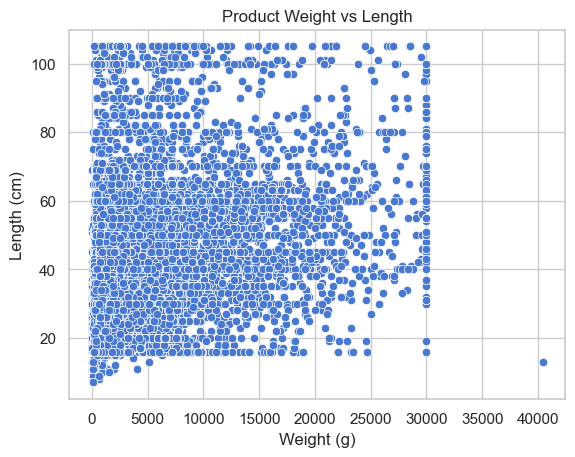

In [29]:
sns.scatterplot(data=df, x='product_weight_g', y='product_length_cm')
plt.title('Product Weight vs Length')
plt.xlabel('Weight (g)')
plt.ylabel('Length (cm)')
plt.show()

#### There’s a clear linear trend between product weight and product length, though some outliers (e.g. extremely heavy but short items) may skew the average. These could be checked in a future outlier analysis.

### Strong Correlations Visualized:
#### - product_weight_g vs. freight_value
##### Trend: A positive linear relationship.
##### Interpretation: Heavier products usually incur higher shipping costs.
##### Insights: This supports logical business assumptions.
##### However, there might be outliers—some small or light items may have high freight due to distance or vendor policy.
##### You may want to consider these for further investigation.

##### The scatterplots confirm strong, mostly linear relationships between logically related features such as price and payment, or product dimensions and freight costs. These visual confirmations validate the quality of the dataset and highlight which features are reliably aligned for use in predictive models.


## 07 Pair Plot (Seaborn)

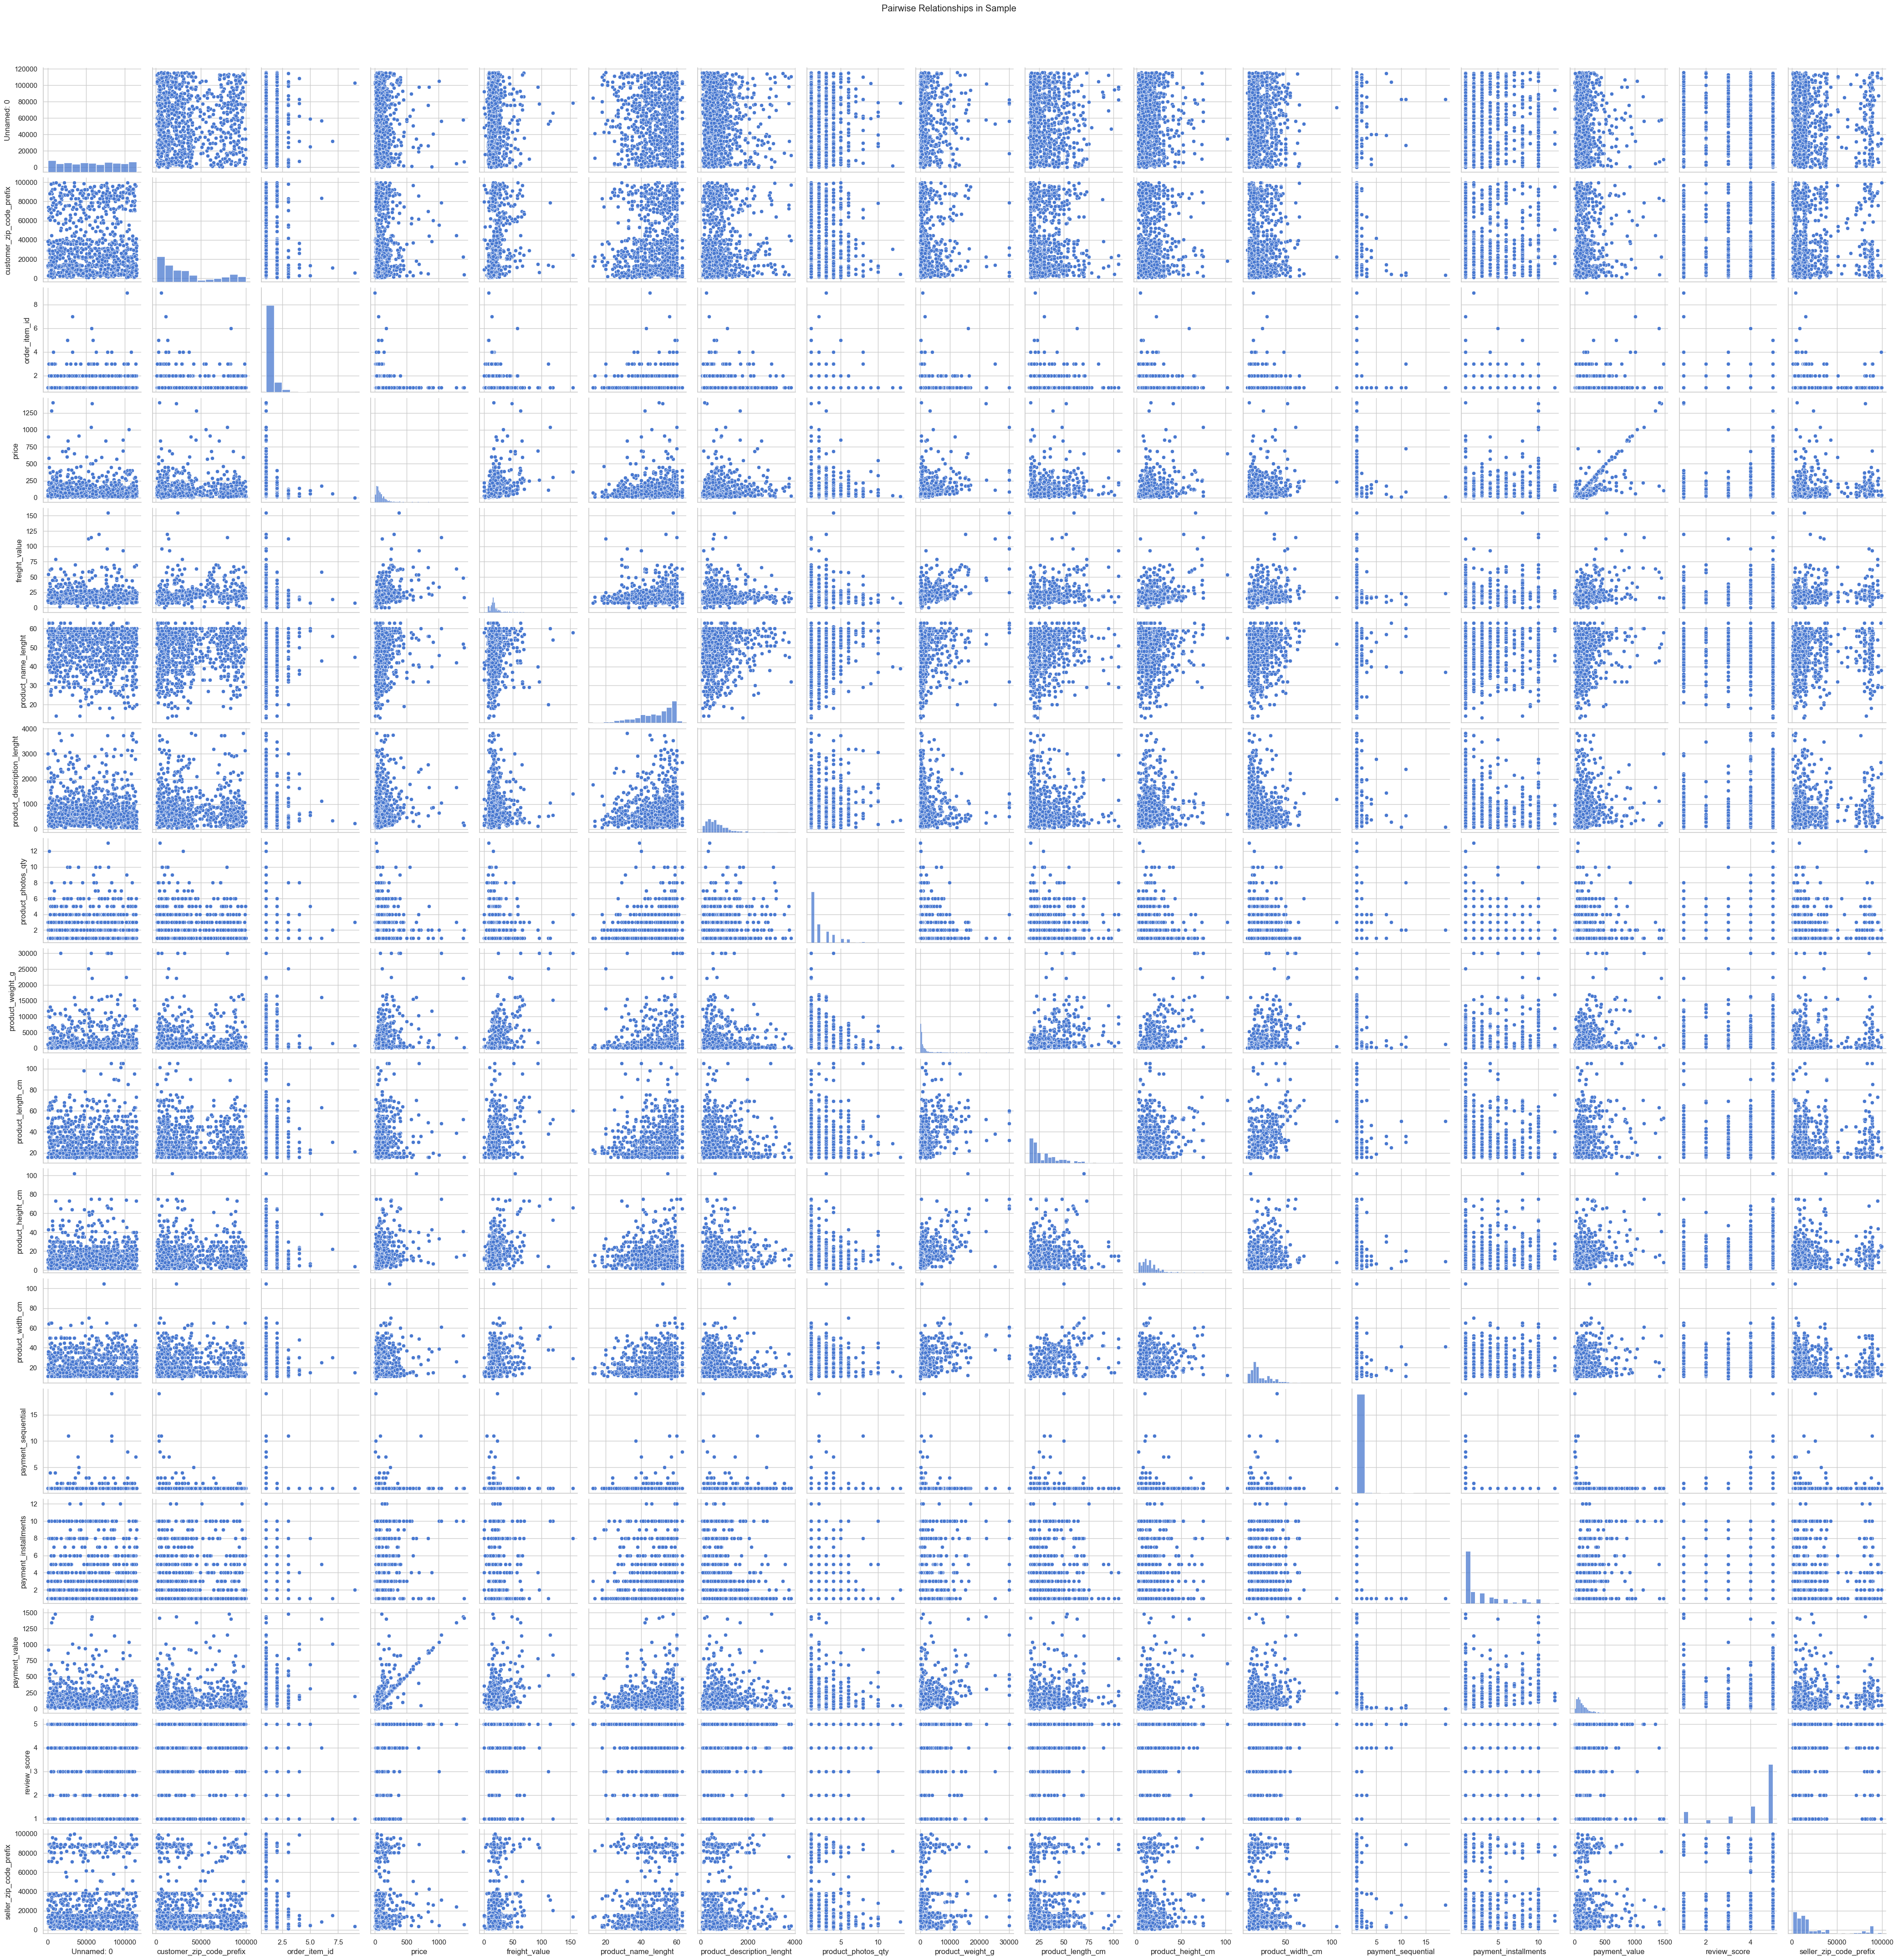

In [41]:
sns.pairplot(df_viz.sample(1000))

# Sample to avoid overload
plt.suptitle('Pairwise Relationships in Sample', y=1.02)
plt.show()

### The pair plot reveals skewed distributions in variables like review_score (heavily 5-star), while payment_value shows a long right tail. freight_value and product_weight_g have a visible positive trend. I’d like to explore how review_score varies by delivery_delay next.

## 08 Create a Delivery_Delay Column

In [51]:
# Ensure the columns are datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Create the delivery delay column
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days


In [54]:
print(df.columns.tolist())

['Unnamed: 0', 'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'delivery_delay']


In [58]:
# clean the new column
df = df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])

## 09 Boxplot

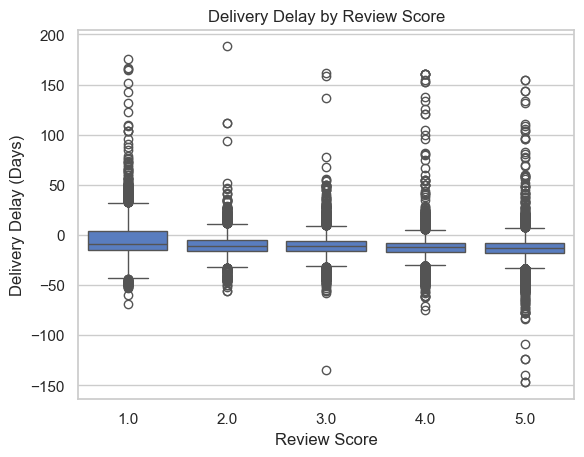

In [67]:
sns.boxplot(data=df, x='review_score', y='delivery_delay')
plt.title('Delivery Delay by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Delay (Days)')
plt.show()

### What the plot shows:

#### The x-axis: Review scores (1 to 5).
#### The y-axis: delivery_delay in days (positive = late delivery, negative = early delivery).
#### Each box summarizes the distribution of delivery delays for a given review score.

### Key Takeaways (likely observations):

#### - 5-Star Reviews:
##### Most deliveries were on time or early (box centered around zero or negative).
##### Very few outliers on the late side.
##### Suggests that timely or early deliveries correlate with high customer satisfaction.

#### - 1- to 2-Star Reviews:
##### Delivery delays tend to be positive (i.e., deliveries were late).
##### The boxes may be taller, showing greater variability, and longer upper whiskers/outliers—indicating more frequent extreme delays.
##### This suggests that late deliveries are a major factor in low review scores.

#### - 3-Star Reviews:
##### Usually centered closer to zero but with wider spread than 5-star.
##### Indicates neutral experiences, possibly influenced by minor delays.

## Conclusion: The boxplot shows a clear negative correlation between delivery delays and customer satisfaction. As delivery delays increase, review scores tend to decrease. This indicates that improving delivery punctuality could boost overall customer satisfaction and review scores.

## 10 Export Visualization

In [85]:
plt.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'correlation_matrix_heatmap.png'), dpi=300, bbox_inches='tight')

In [89]:
plt.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'scatter_weight_vs_length.png'),
    dpi=300,
    bbox_inches='tight'
)